In [1]:
import numpy as np
import scipy.io as sio
import math
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
%matplotlib inline
plt.style.use('default')
line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

root = './prev_results/'

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

In [3]:
def aupr_auroc_prev_new(result, idx, save=None):
    
    end = 5000 + 5000*(idx+1)
    fontsize = 15
    
    precision, recall, thresholds = precision_recall_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    fpr, tpr, thresholds = roc_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    aupr = average_precision_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    auroc = roc_auc_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    
    density_prev = np.zeros(100)
    density_new = np.zeros(100)
    result['bin_prob'][0][idx][0][:end-5000]
    bin_prob_prev = result['bin_prob'][0][idx][0][:end-5000]
    bin_prob_new = result['bin_prob'][0][idx][0][end-5000:end]
    for prob in bin_prob_prev:
        i = math.floor(prob*100)
        if i >= 100:
            i=99
        density_prev[i] += 1
    
    for prob in bin_prob_new:
        i = math.floor(prob*100)
        if i >= 100:
            i=99
        density_new[i] += 1
    
    plt.figure(figsize = (20,5))

#     plt.plot(recall, precision, linestyle='-', label='bin_prob')
#     plt.grid(b=True, which='major', axis='both')
#     plt.xlabel('Recall', fontsize=fontsize)
#     plt.ylabel('Precision', fontsize=fontsize)
#     plt.title('AURP: %.3f'%aupr, fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,1)
    plt.plot(fpr, tpr, linestyle='-', label='bin_prob')
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('FPR', fontsize=fontsize)
    plt.ylabel('TPR', fontsize=fontsize)
    plt.title('AUROC: %.3f'%auroc, fontsize=fontsize)
    
    plt.style.use('default')
    plt.subplot(1,4,2)
    plt.plot(np.arange(100)/100, density_prev/(end-5000), linestyle='-', label='prev')
    plt.plot(np.arange(100)/100, density_new/(5000), linestyle='-', label='new')
    plt.xlabel('Confidence', fontsize=fontsize)
    plt.legend(loc = 'upper left')
    plt.title('density', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,3)
    plt.plot(np.arange(end-5000), np.sort(result['bin_prob'][0][idx][0][:end-5000]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('Prev class', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,4)
    plt.plot(np.arange(5000), np.sort(result['bin_prob'][0][idx][0][end-5000:end]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('New class', fontsize=fontsize)


    print(np.mean(result['bin_prob'][0][idx][0][:end-5000]))
    print(np.mean(result['bin_prob'][0][idx][0][end-5000:end]))
    
    if save is not None:
        plt.tight_layout()
        plt.savefig('./figures/'+save+'.pdf')

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 5
AUROC
[0.77218266 0.79918117 0.79808167]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [78. 75. 84.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 74. 84.  0.  0.  0.  0.  0.  0.]]
0.62927514
0.86950606


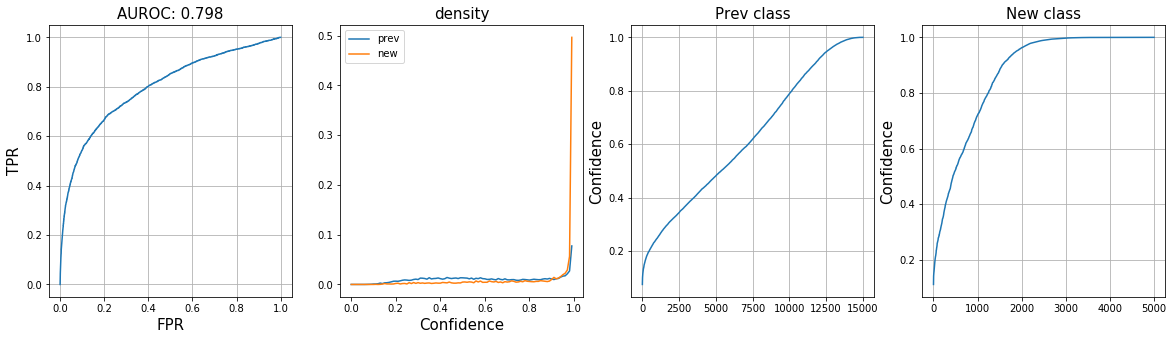

In [4]:
result = sio.loadmat(root+'191231_Imagenet_ood_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 5')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 5
AUROC
[0.85107118 0.8663523  0.85654159]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [74. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [67. 69. 83.  0.  0.  0.  0.  0.  0.  0.]
 [60. 58. 64. 83.  0.  0.  0.  0.  0.  0.]]
0.11512526
0.49131


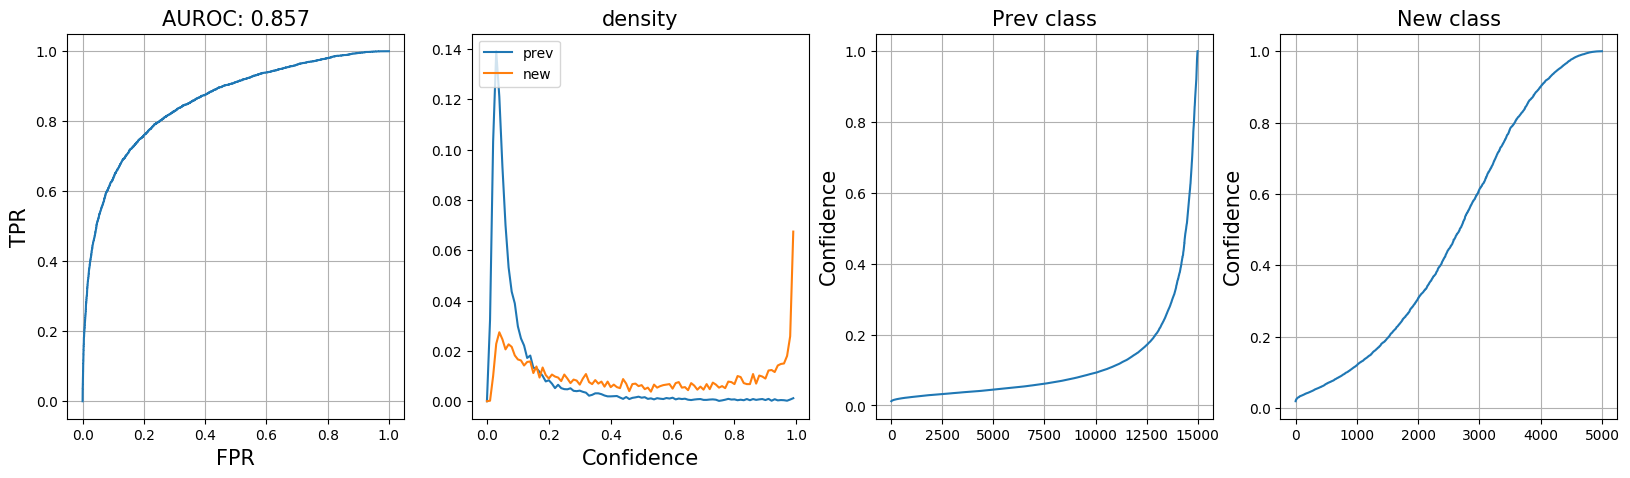

In [5]:
result = sio.loadmat(root+'191231_Imagenet_ood_0_memsz_20000_alpha_1_beta_10.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 5')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)


dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 5
AUROC
[[0.7008784  0.71864423 0.73723176]]
[[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [36. 73.  0.  0.  0.  0.  0.  0.  0.  0.]
 [29. 47. 74.  0.  0.  0.  0.  0.  0.  0.]
 [26. 42. 42. 73.  0.  0.  0.  0.  0.  0.]]
5.2526793
8.550442


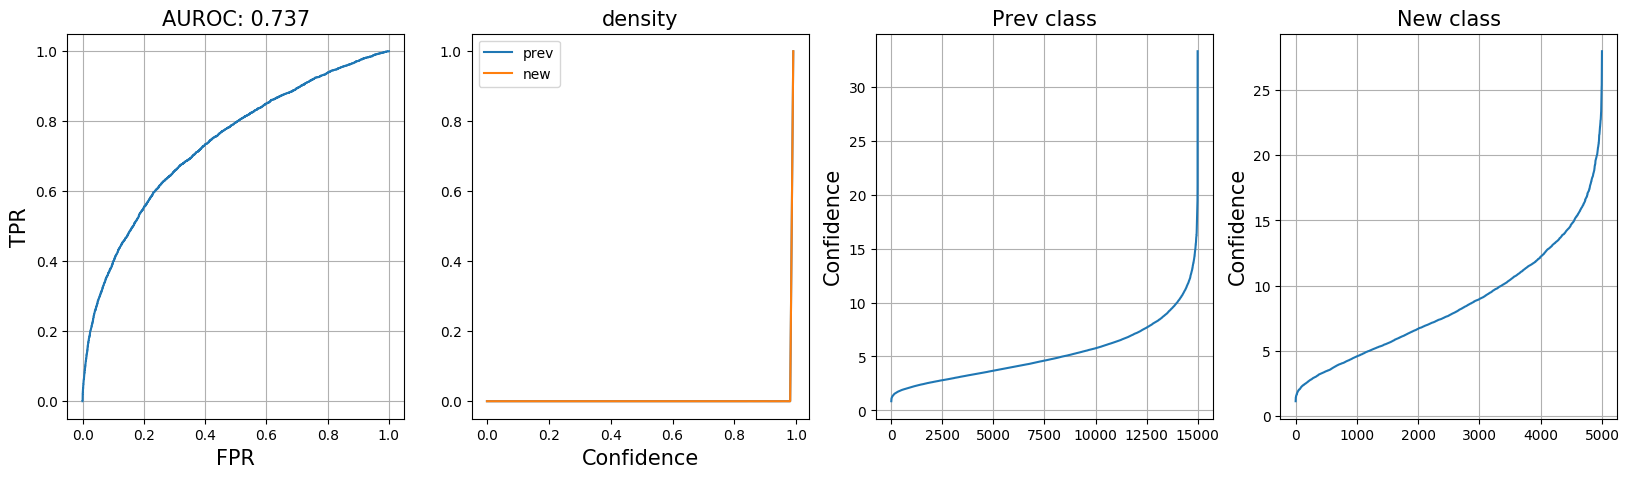

In [6]:
result = sio.loadmat(root+'200115_Imagenet_ood_0_memsz_20000_alpha_1_beta_0.0_base_100_replay_32_batch_32_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 5')

idx = 2

print('AUROC')

print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 0.6, beta: 5, prev_new, uniform_penalty, LabelSmoothing
AUROC
[[0.202201   0.23015408 0.23394402]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [64. 69.  0.  0.  0.  0.  0.  0.  0.  0.]
 [60. 57. 68.  0.  0.  0.  0.  0.  0.  0.]
 [60. 55. 54. 66.  0.  0.  0.  0.  0.  0.]]
0.32459003
0.62770677


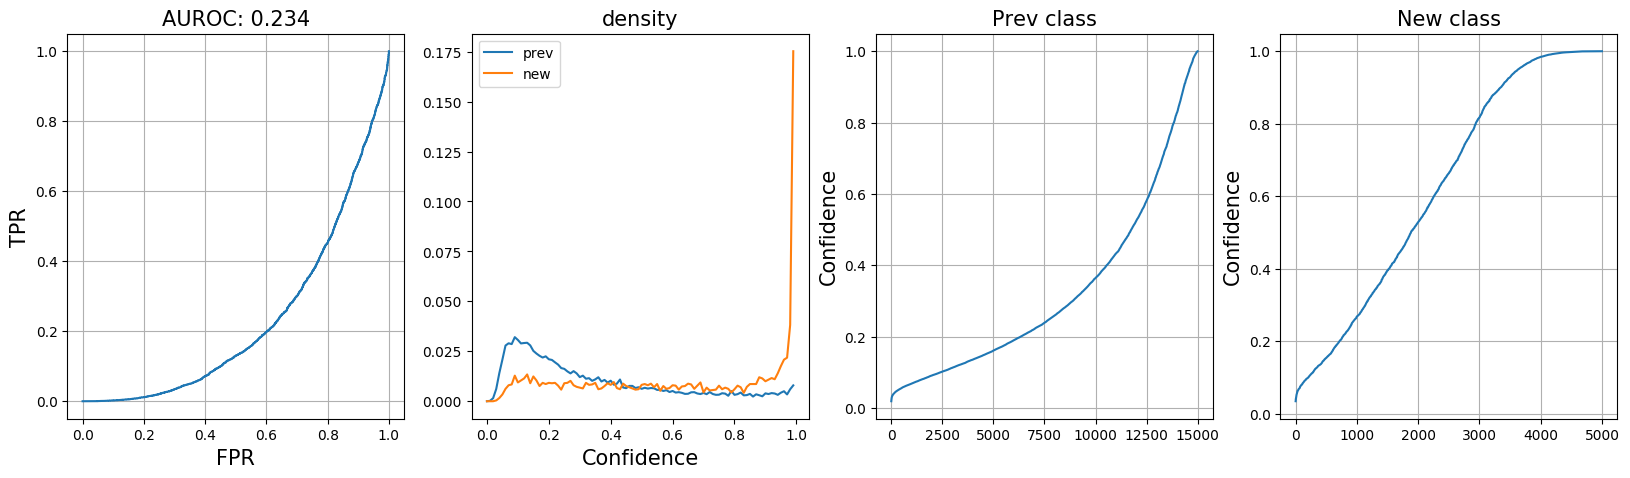

In [7]:
result = sio.loadmat(root+'200118_Imagenet_ood_0_memsz_20000_alpha_0.6_beta_5.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_LabelSmoothing.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 0.6, beta: 5, prev_new, uniform_penalty, LabelSmoothing')

idx = 2

print('AUROC')

print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 0.6, prev_new, LabelSmoothing
AUROC
[[0.77379942 0.79601218 0.79232043]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 84.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 75. 84.  0.  0.  0.  0.  0.  0.]]
0.62270564
0.86252576


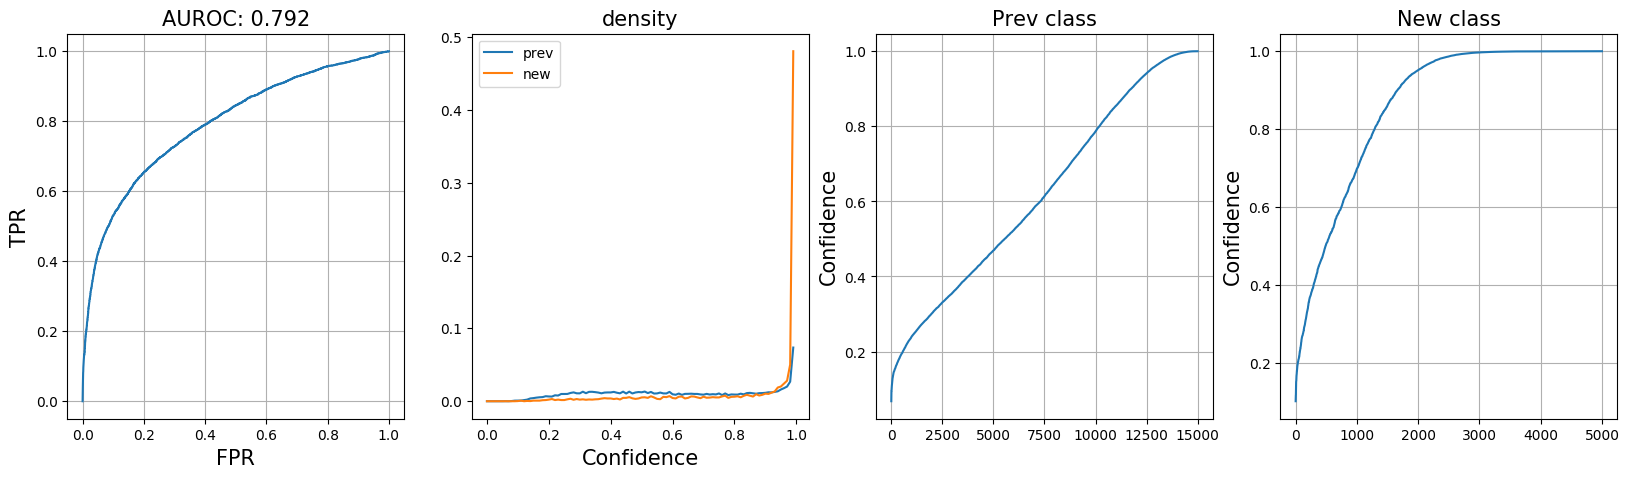

In [8]:
result = sio.loadmat(root+'200118_Imagenet_ood_0_memsz_20000_alpha_0.6_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_LabelSmoothing.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 0.6, prev_new, LabelSmoothing')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 0.7, prev_new, LabelSmoothing
AUROC
[[0.76942356 0.79686768 0.79512121]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 76. 83.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 74. 84.  0.  0.  0.  0.  0.  0.]]
0.6265917
0.86606413


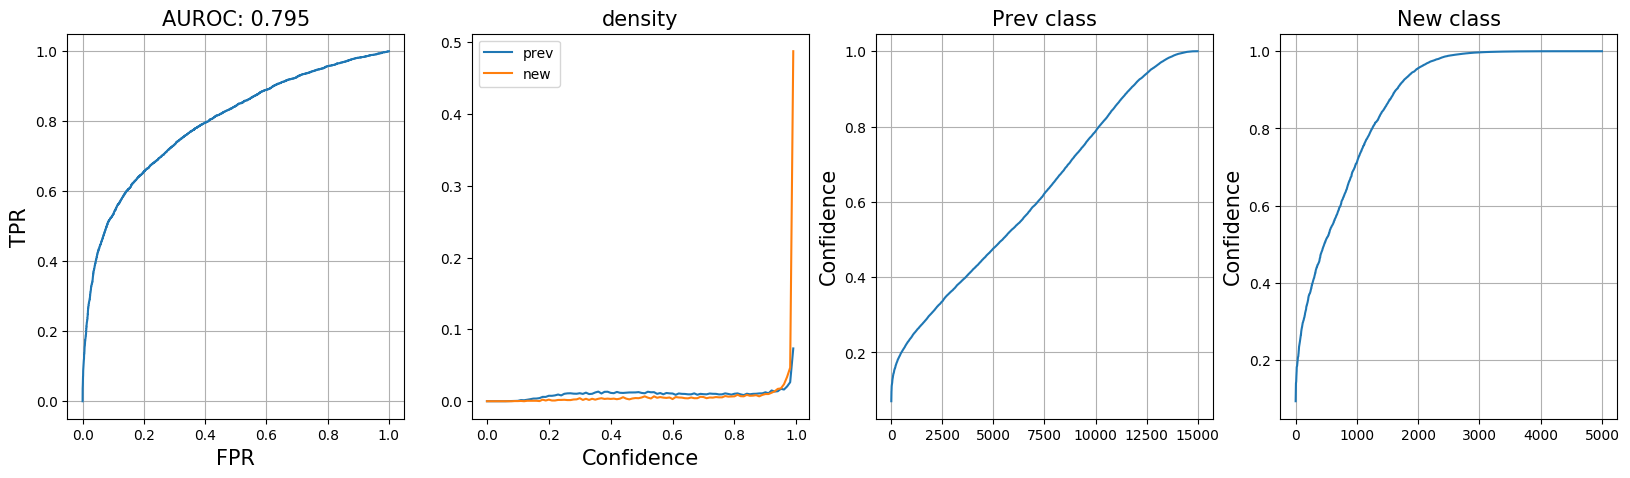

In [9]:
result = sio.loadmat(root+'200118_Imagenet_ood_0_memsz_20000_alpha_0.7_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_LabelSmoothing.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 0.7, prev_new, LabelSmoothing')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 0.8, prev_new, LabelSmoothing
AUROC
[[0.76696514 0.79554501 0.7958677 ]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 84.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 74. 84.  0.  0.  0.  0.  0.  0.]]
0.6294819
0.8675838


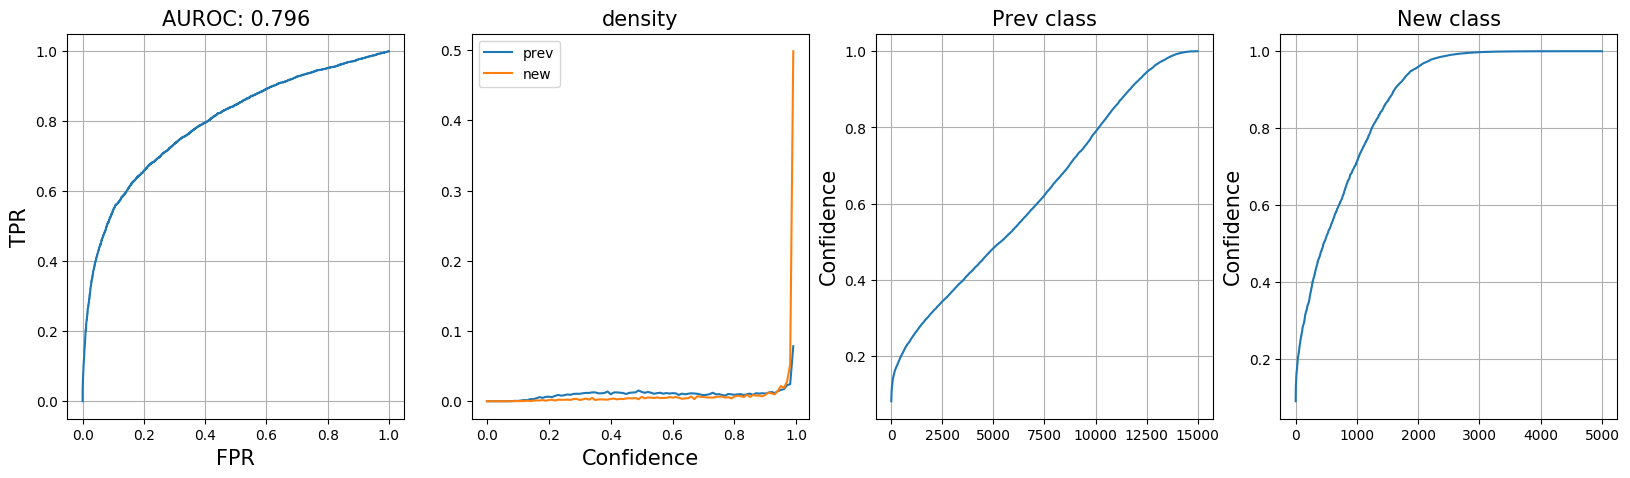

In [10]:
result = sio.loadmat(root+'200118_Imagenet_ood_0_memsz_20000_alpha_0.8_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_LabelSmoothing.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 0.8, prev_new, LabelSmoothing')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 0.9, prev_new, LabelSmoothing
AUROC
[[0.77052648 0.79589356 0.79734423]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 84.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 75. 84.  0.  0.  0.  0.  0.  0.]]
0.6290073
0.8689625


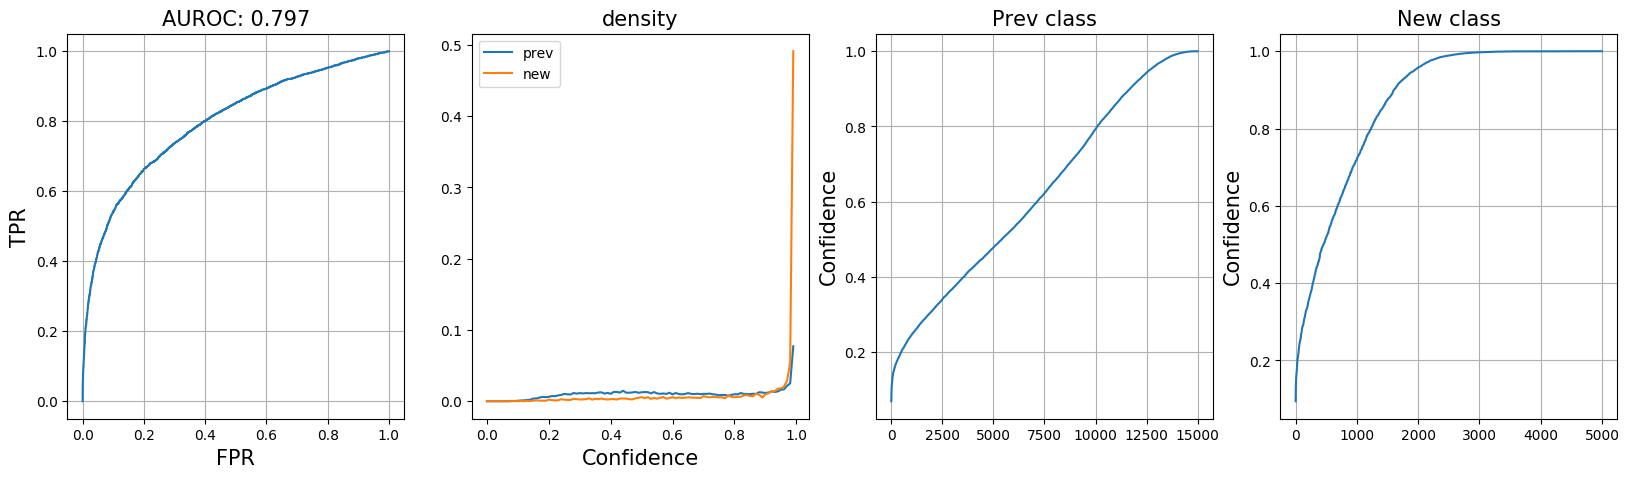

In [11]:
result = sio.loadmat(root+'200118_Imagenet_ood_0_memsz_20000_alpha_0.9_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_LabelSmoothing.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 0.9, prev_new, LabelSmoothing')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 0.6, prev_new, uniform penalty, LabelSmoothing
AUROC
[[0.82489628 0.82293396 0.81511491]]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [75. 79.  0.  0.  0.  0.  0.  0.  0.  0.]
 [72. 68. 79.  0.  0.  0.  0.  0.  0.  0.]
 [70. 66. 67. 79.  0.  0.  0.  0.  0.  0.]]
0.45724723
0.7915435


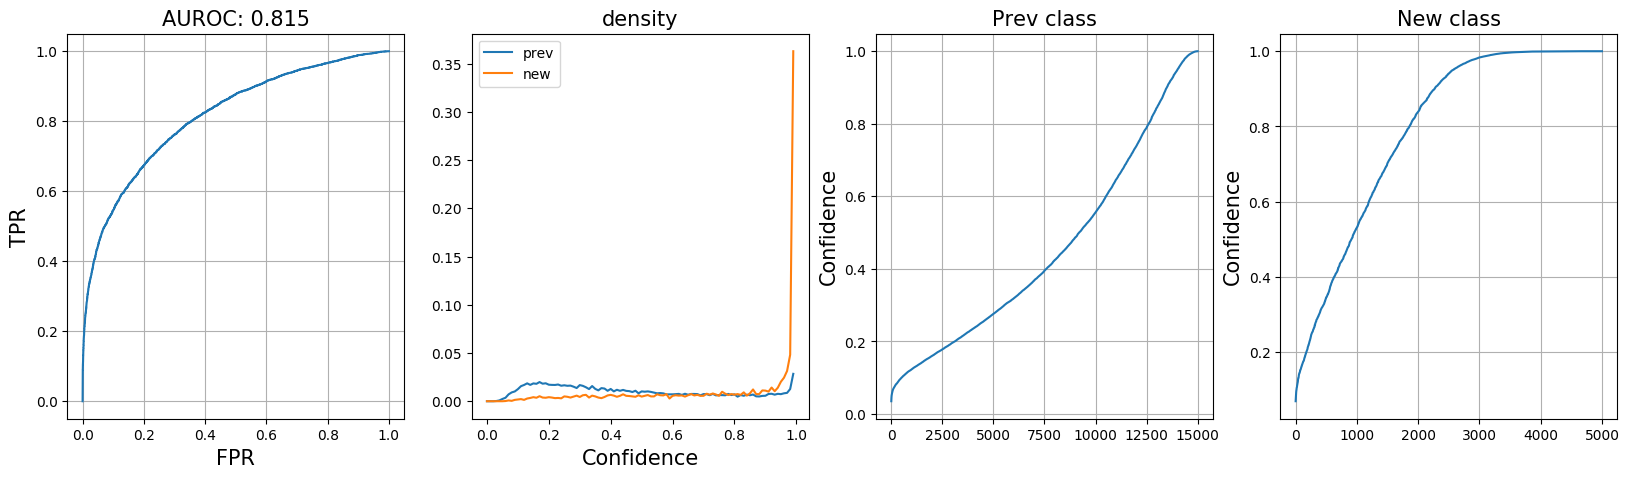

In [12]:
result = sio.loadmat(root+'200118_Imagenet_ood_0_memsz_20000_alpha_0.6_beta_1.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_LabelSmoothing.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 0.6, prev_new, uniform penalty, LabelSmoothing')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 0.7, prev_new, uniform penalty, LabelSmoothing
AUROC
[[0.83652658 0.82915372 0.82028751]]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [76. 79.  0.  0.  0.  0.  0.  0.  0.  0.]
 [73. 70. 80.  0.  0.  0.  0.  0.  0.  0.]
 [72. 67. 68. 79.  0.  0.  0.  0.  0.  0.]]
0.4658573
0.80387014


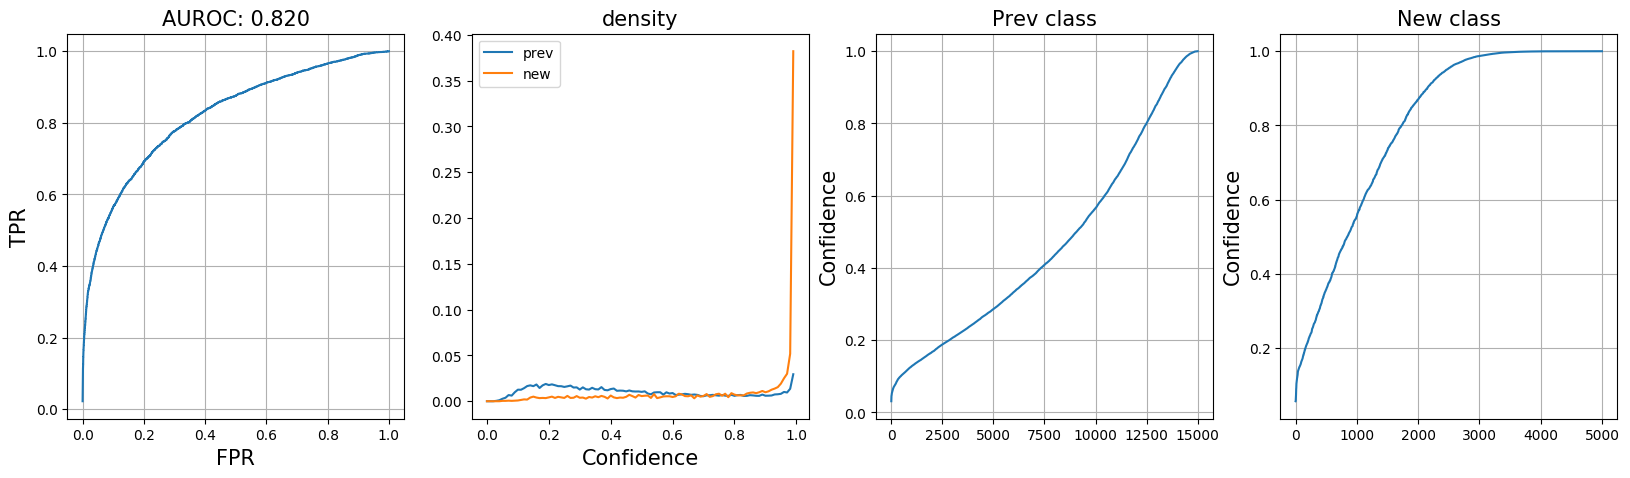

In [13]:
result = sio.loadmat(root+'200118_Imagenet_ood_0_memsz_20000_alpha_0.7_beta_1.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_LabelSmoothing.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 0.7, prev_new, uniform penalty, LabelSmoothing')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4,  uniform penalty, CI
AUROC
[[0.8045759  0.81981111 0.82992027]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [32. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [19. 32. 84.  0.  0.  0.  0.  0.  0.  0.]
 [16. 22. 30. 83.  0.  0.  0.  0.  0.  0.]]
0.09524325
0.27791747


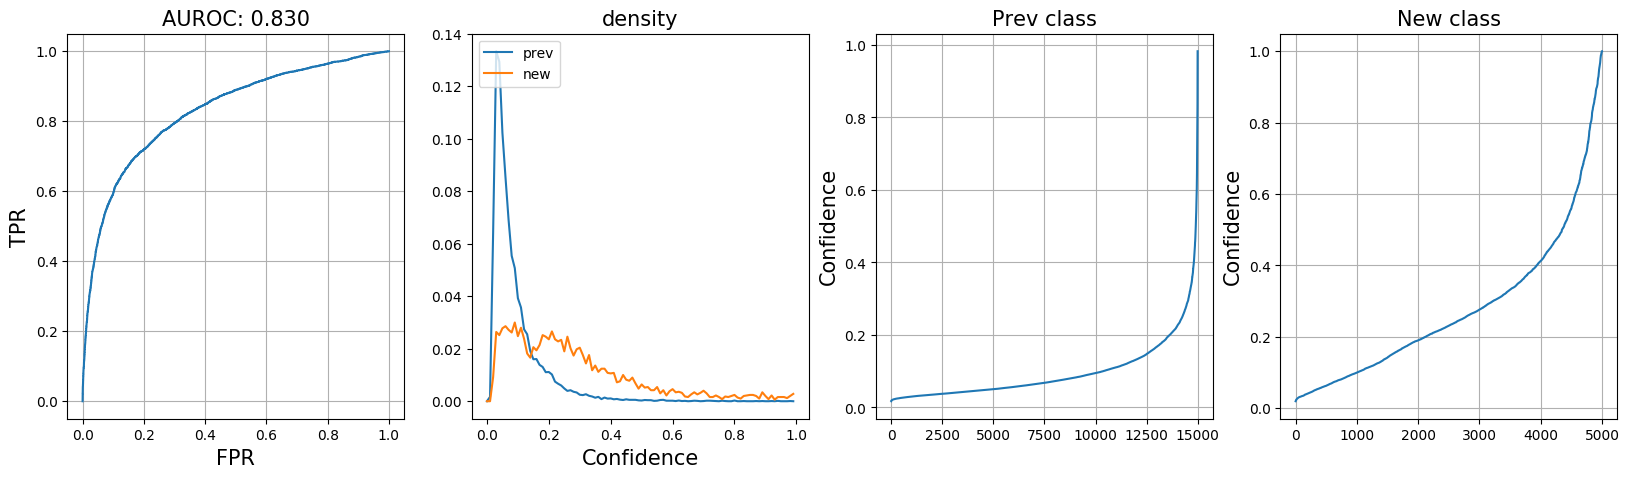

In [14]:
result = sio.loadmat(root+'200121_Imagenet_ood_0_memsz_20000_alpha_1_beta_5.0_base_100_replay_8_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4,  uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 64, factor:4,  uniform penalty, CI
AUROC
[[0.79031178 0.80686568 0.81494491]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [31. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [21. 32. 82.  0.  0.  0.  0.  0.  0.  0.]
 [17. 21. 31. 82.  0.  0.  0.  0.  0.  0.]]
0.09165176
0.26283345


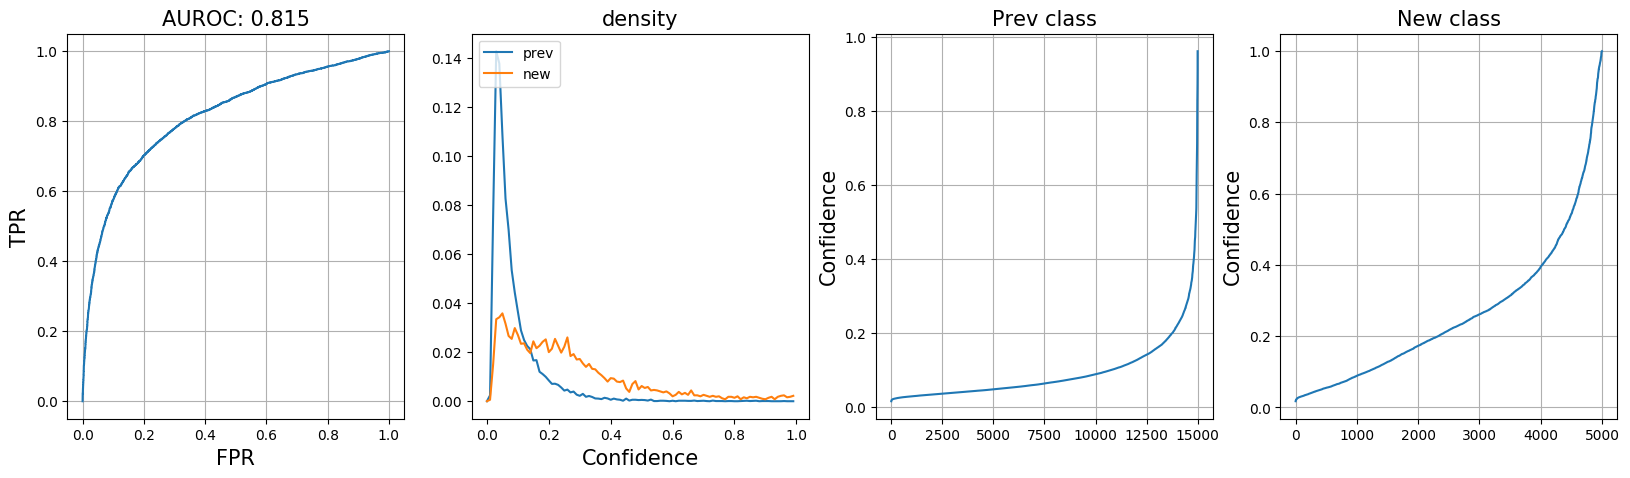

In [15]:
result = sio.loadmat(root+'200121_Imagenet_ood_0_memsz_20000_alpha_1_beta_5.0_base_100_replay_16_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 64, factor:4,  uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4,  uniform penalty, CI
AUROC
[[0.78707954 0.81049687 0.81693149]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [31. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [19. 32. 84.  0.  0.  0.  0.  0.  0.  0.]
 [16. 22. 32. 84.  0.  0.  0.  0.  0.  0.]]
0.089188024
0.18914297


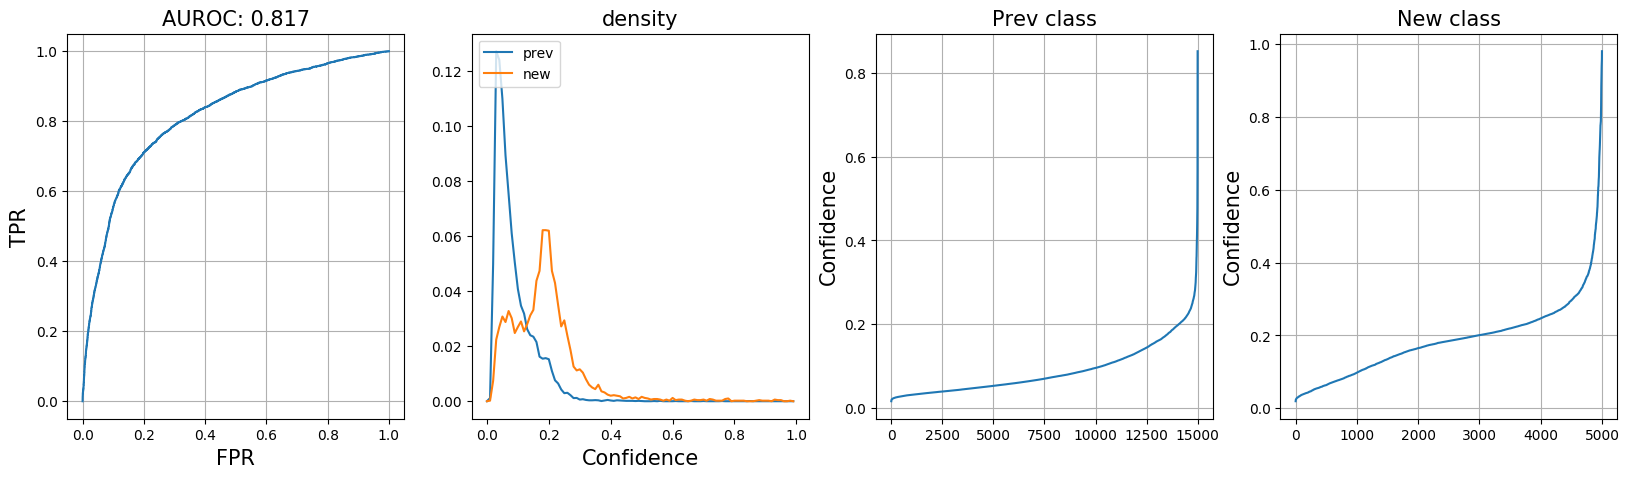

In [16]:
result = sio.loadmat(root+'200121_Imagenet_ood_0_memsz_20000_alpha_1_beta_5.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4,  uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.80222816 0.81389132 0.81772727]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [38. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [25. 39. 85.  0.  0.  0.  0.  0.  0.  0.]
 [24. 29. 38. 84.  0.  0.  0.  0.  0.  0.]]
0.26310304
0.5316046


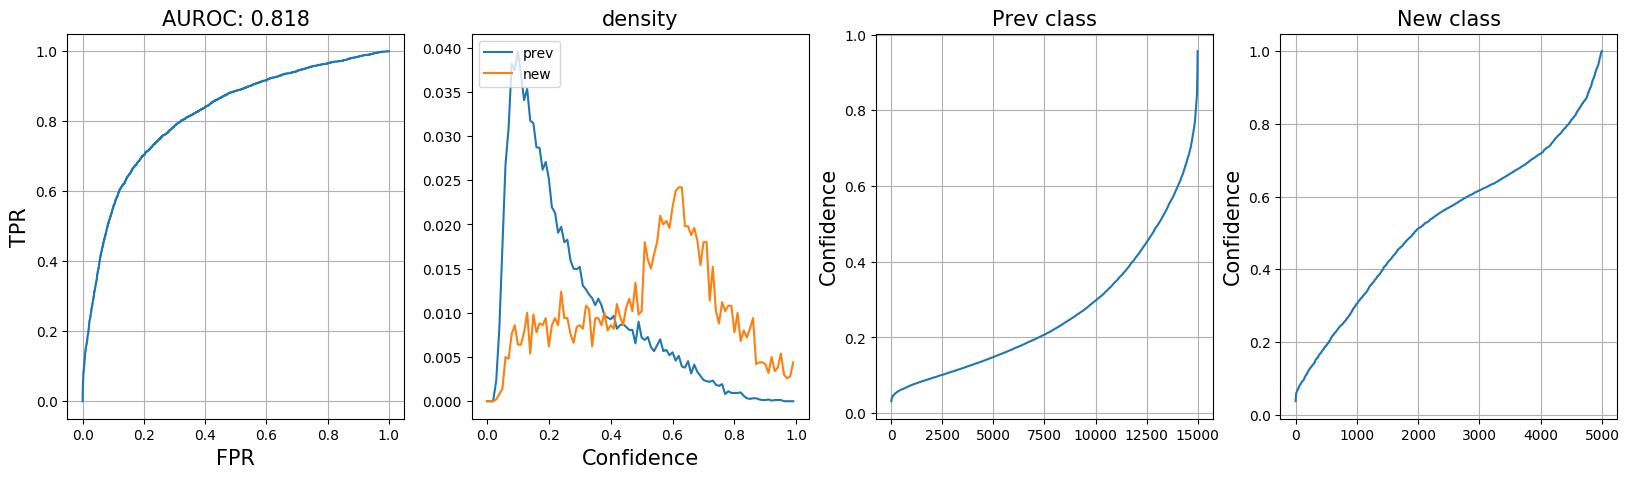

In [17]:
result = sio.loadmat(root+'rand_rot_aug_Imagenet_ood_0_memsz_20000_alpha_1_beta_1.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.8066541  0.82415068 0.8281632 ]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [32. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [22. 32. 84.  0.  0.  0.  0.  0.  0.  0.]
 [18. 22. 33. 84.  0.  0.  0.  0.  0.  0.]]
0.093715034
0.26680943


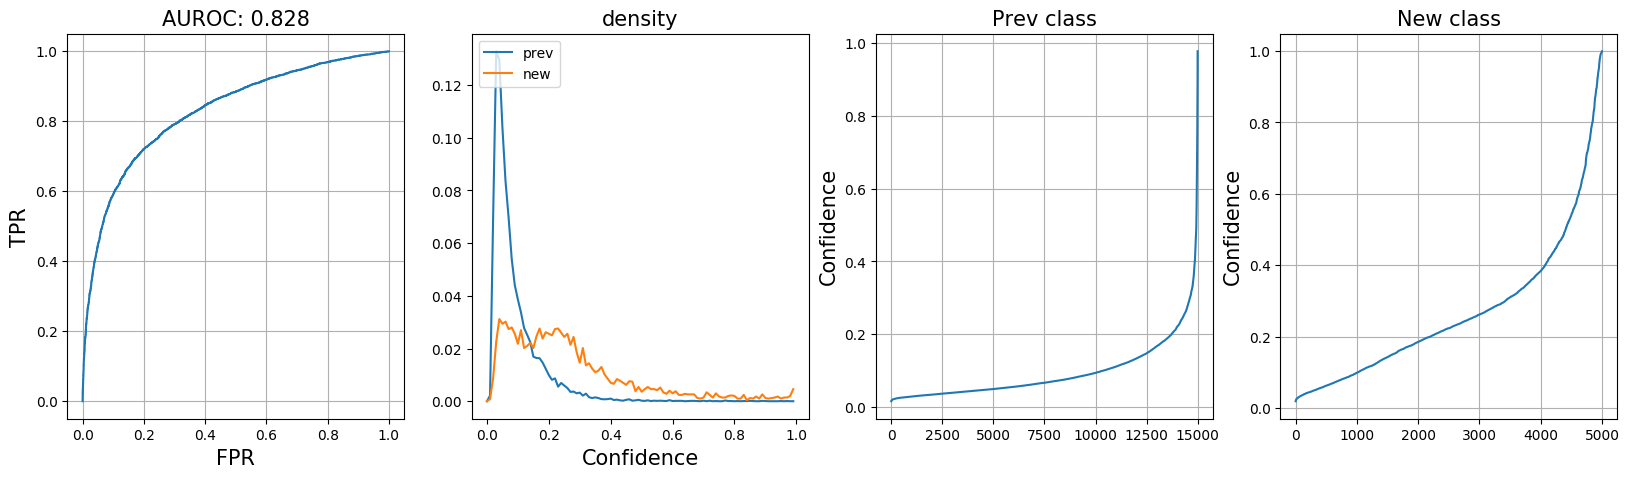

In [18]:
result = sio.loadmat(root+'rand_rot_aug_Imagenet_ood_0_memsz_20000_alpha_1_beta_5.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.85794646 0.85727246 0.85175018]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [28. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [16. 27. 82.  0.  0.  0.  0.  0.  0.  0.]
 [15. 18. 28. 82.  0.  0.  0.  0.  0.  0.]]
0.084360845
0.3920541


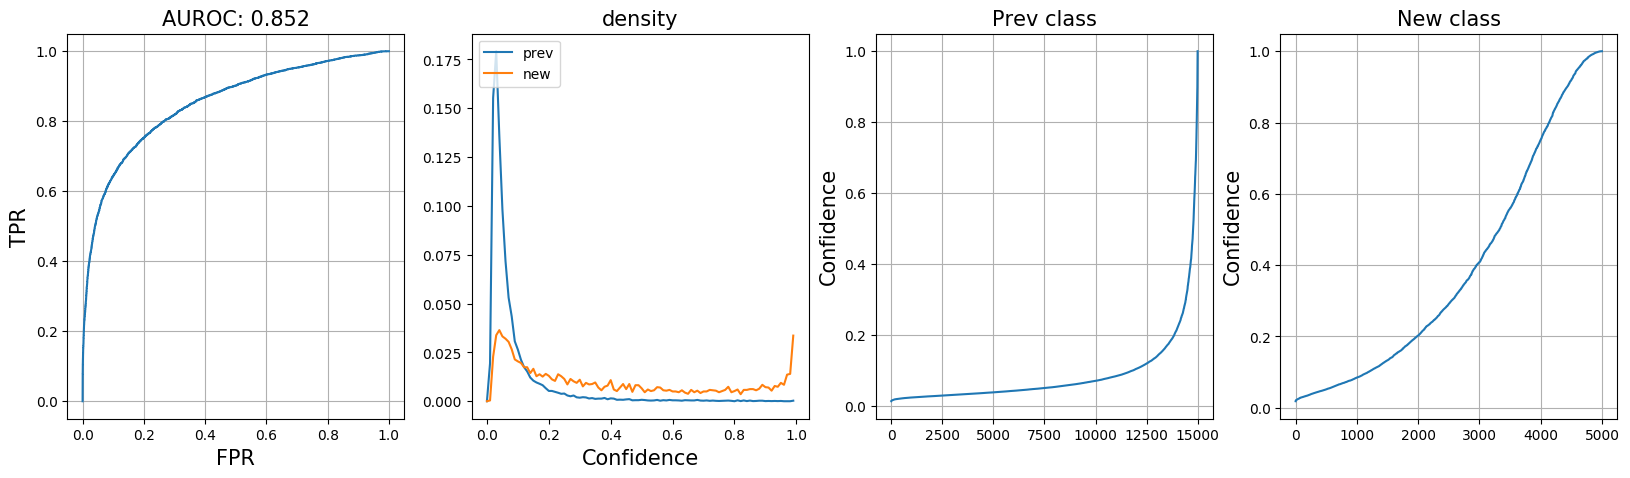

In [19]:
result = sio.loadmat(root+'original_Imagenet_ood_0_memsz_20000_alpha_1_beta_5.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.8507229  0.85103951 0.85085017]]
[[83.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [23. 81.  0.  0.  0.  0.  0.  0.  0.  0.]
 [12. 23. 81.  0.  0.  0.  0.  0.  0.  0.]
 [11. 16. 25. 81.  0.  0.  0.  0.  0.  0.]]
0.05076272
0.29596928


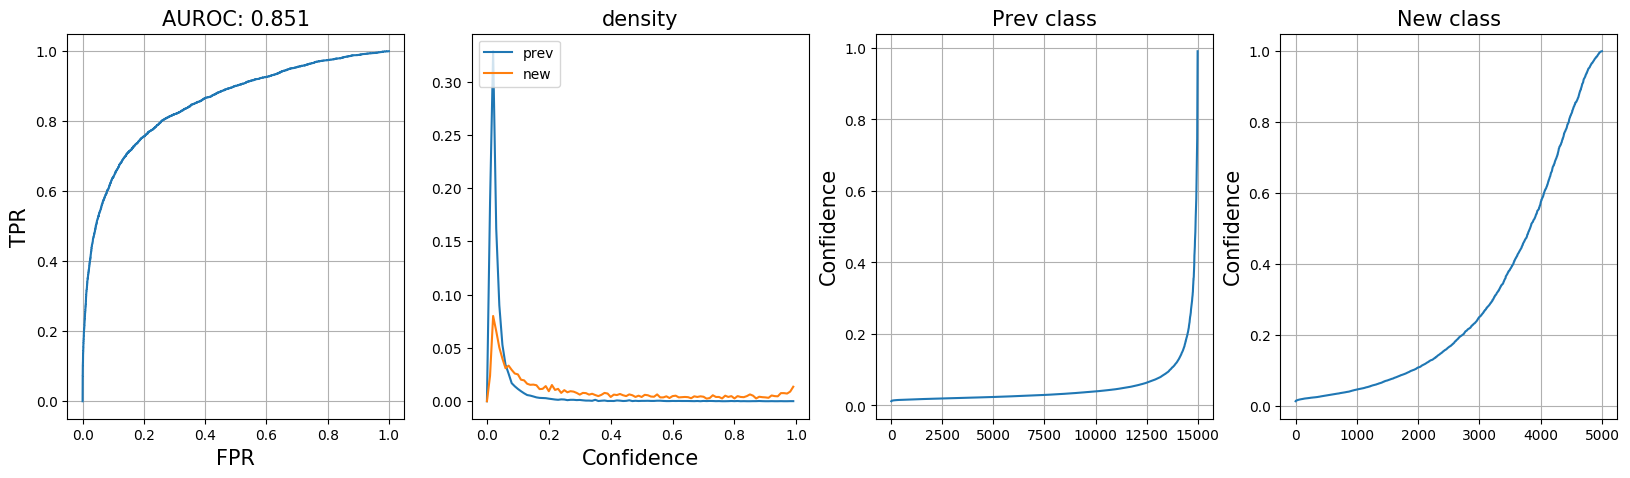

In [20]:
result = sio.loadmat(root+'original_Imagenet_ood_0_memsz_20000_alpha_1_beta_10.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.84478286 0.84951559 0.84357105]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [78. 75. 85.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 74. 84.  0.  0.  0.  0.  0.  0.]]
0.51214415
0.8540301


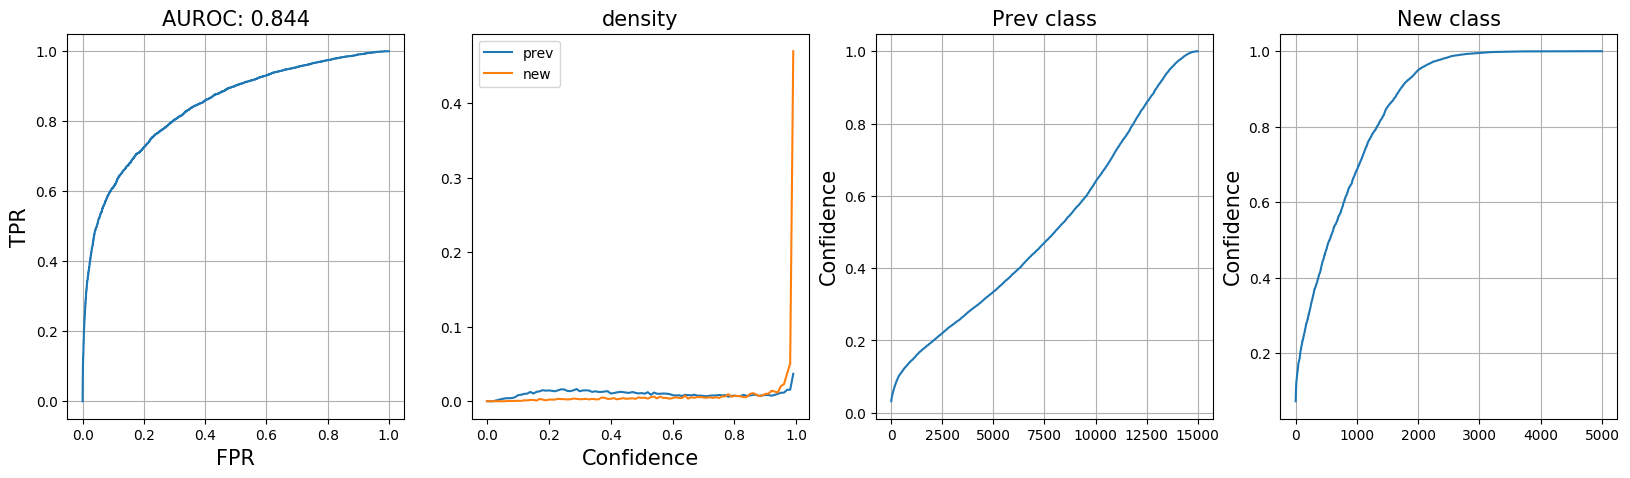

In [21]:
result = sio.loadmat(root+'conf_weight_Imagenet_ood_0_memsz_20000_alpha_1_beta_0.001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.84589928 0.85240127 0.82874161]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [75. 72. 82.  0.  0.  0.  0.  0.  0.  0.]
 [73. 68. 69. 80.  0.  0.  0.  0.  0.  0.]]
0.4507888
0.80336696


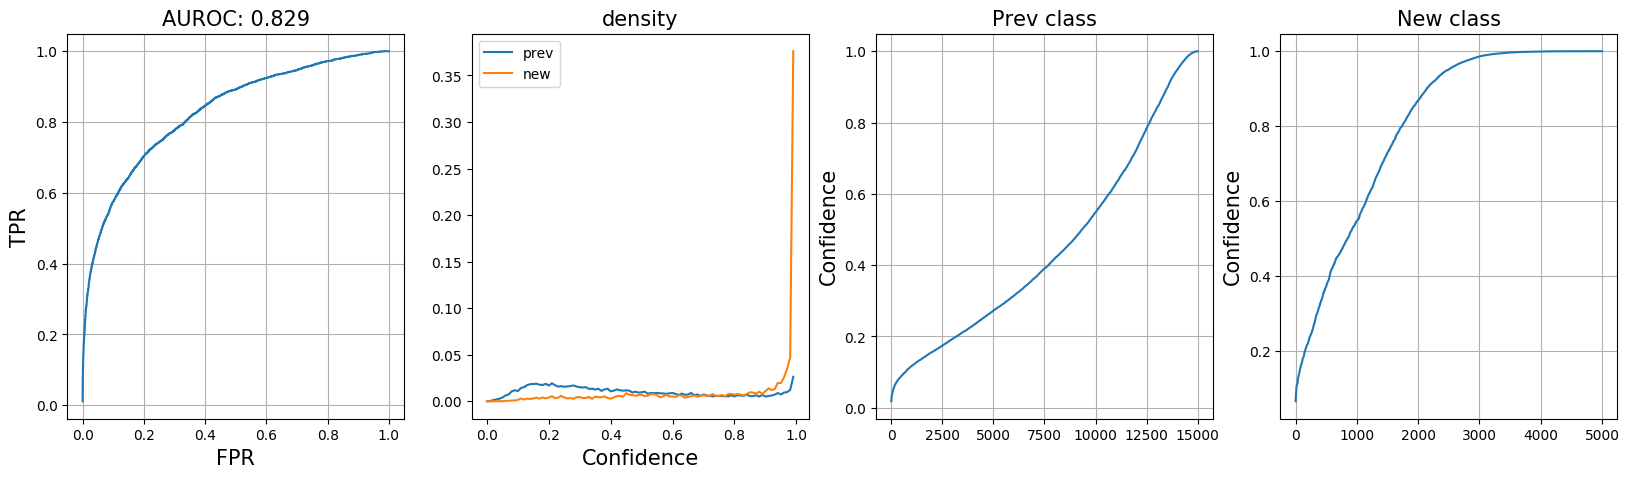

In [22]:
result = sio.loadmat(root+'conf_weight_Imagenet_ood_0_memsz_20000_alpha_1_beta_0.01_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.80415774 0.78910308 0.77127377]]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [70. 74.  0.  0.  0.  0.  0.  0.  0.  0.]
 [65. 61. 72.  0.  0.  0.  0.  0.  0.  0.]
 [59. 54. 51. 66.  0.  0.  0.  0.  0.  0.]]
0.1891239
0.47656953


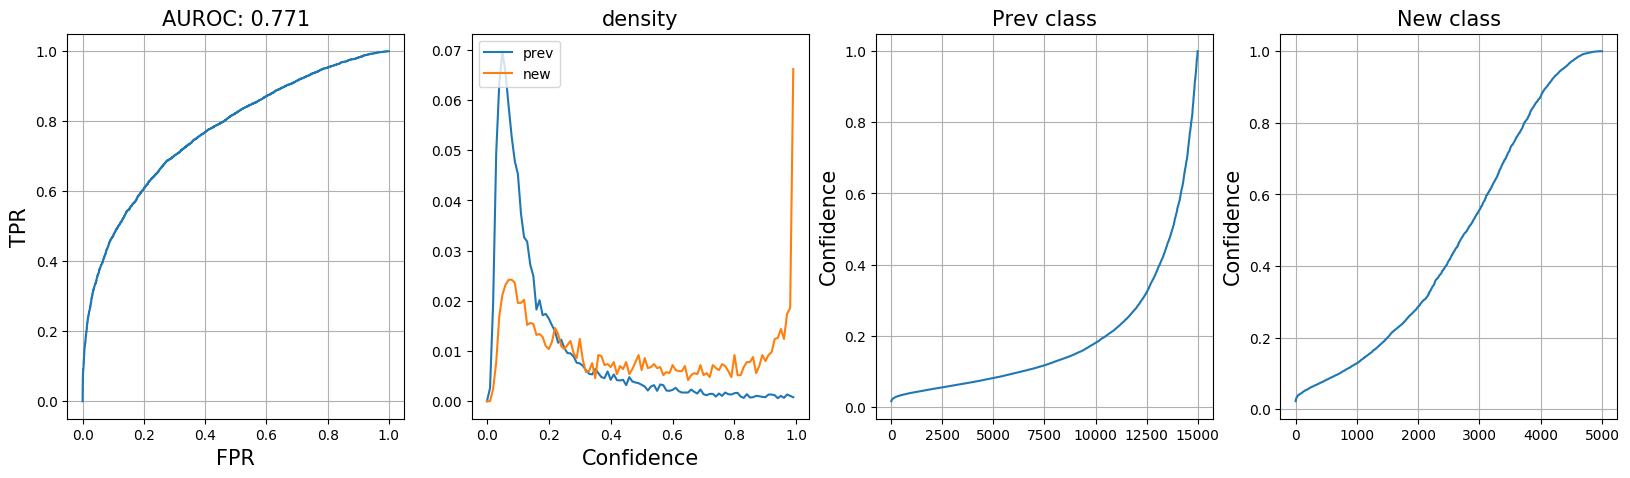

In [23]:
result = sio.loadmat(root+'conf_weight_Imagenet_ood_0_memsz_20000_alpha_1_beta_0.1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI
AUROC
[[0.76453392 0.72166908 0.67003213]]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 62.  0.  0.  0.  0.  0.  0.  0.  0.]
 [58. 52. 57.  0.  0.  0.  0.  0.  0.  0.]
 [50. 46. 44. 42.  0.  0.  0.  0.  0.  0.]]
0.019687986
0.060803566


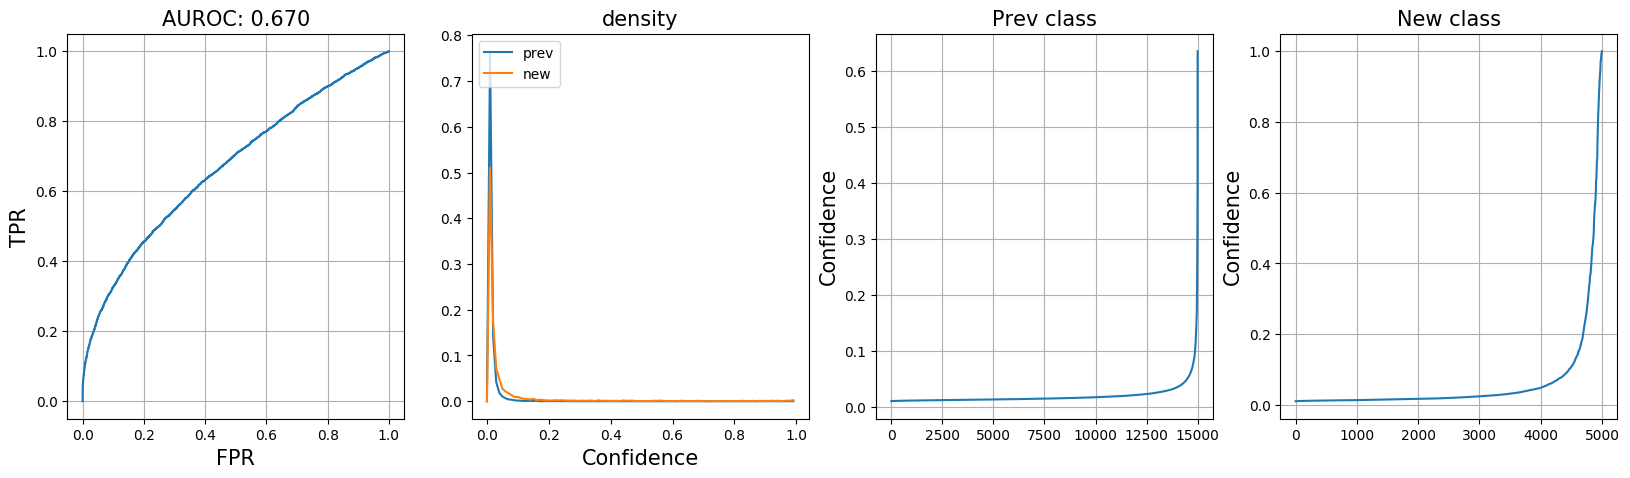

In [24]:
result = sio.loadmat(root+'conf_weight_Imagenet_ood_0_memsz_20000_alpha_1_beta_1.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, uniform penalty, CI')

idx = 2

print('AUROC')
print(result['auroc'])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)